<a href="https://colab.research.google.com/github/RajeswariSahu/Data-Science-Projects/blob/main/PRCP_1025_FlightPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRCP-1025-FlightPricePrediction
# Project team ID - PTID-CDS-NOV-23-1703

# Business Case : To predict the ticket price of the flight based on the given data

# Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from datetime import datetime
from datetime import datetime, timedelta
import time
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset¶

In [ ]:
# import data
data=pd.read_excel('Flight_Fare.xlsx')
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Domain Analysis

1.Airline : This column shows the name of the airline company.

2.Date_of_Journey : This column represents on which date the passengers journey started.

3.Source : This column represents from which location the flight journey started.

4.Destination : It shows where the final place of the journey is.

5.Route : The sequence of connecting cities or airports that the flight will pass through from source to destination.

6.Dep_Time : The departure time of the flight from starting place of the journey.

7.Arrival_Time : It shows the time that when the flight reached its destination point.

8.Duration : It shows the duration of journey from source to destination.

9.Total_Stops : It tells that in how many places flights will stop there in the whole journey.

10.Additional_Info : : In this column, we will get information about food, kind of food, and other amenities.

11.Price : Price of the flight for a complete journey including all the expenses before onboarding.

point 1-10 are called feature/input variable and the price column is the target/output variable.

# Basic checks

In [ ]:
data.shape     # check number of rows and columns

(10683, 11)

In [ ]:
data.head()    # it shows first five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
data.tail()     # it shows last five rows

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [ ]:
data.columns    # shows the name of columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
data.info()     # shows non_null count and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
data.describe()    # shows the statistical report

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
data.describe(include='O')    # shows statistical report of object data type

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [ ]:
data.dtypes        # check data types of each column

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [ ]:
data.isnull().sum()    # check the number of null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [ ]:
len(data.isnull().sum())/len(data)    # check the percentage of null values

0.001029673312739867

In [ ]:
data.duplicated().sum()    # check the duplicated values

220

In [ ]:
# check no.of categories and value counts of categorical columns
x=['Airline','Source','Destination','Total_Stops','Additional_Info']
for i in x:
  print(i,data[i].unique())
  print('**********************')
  print(i,data[i].value_counts())
  print('-----------------------')

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
**********************
Airline Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
**********************
Source Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-------------

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 35.4 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html('my_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Insights from univariate analysis

1.In the dataset out of 11 features,there are 6 categorical,1 numerical and rest 4 are text kind of data.

2.Categorical features are Airline,Date_of_Journey,Source,Destination,Total_Stops,Additional_Info.

3.Numerical feature is Price

4.Route,Dep_Time,Arrival_Time,Duration are the text kind of data.

5.From the Sweetviz report which is for univariate analysis,what we are analyzing is given below

a.Airline-In this column there are 12 distinct airlines.Out of which Jet Airways has maximum number of flights that is 36% out of the total number of flights.Indigo airline is in the second position that is 19% and in the third position, Air India is there.

b.Source- In this column there are 5 distinct places, where passengers were started their journey.many flights i.e 42% were started their journey from Delhi.27% flights from Kolkata and 21% from Banglore.These three are the major cities.

c.Destination-In this column there are 6 distinct places, where passengers were stoped their journey.Here 3 cities are mainly coming to the picture.These are Cochin,Banglore and Delhi.Many passengers i.e 42% flights had their destination in Cochin.The destination city of 27% flights was Banglore.12% was Delhi.Rest cities have very less percentage.

d.Total_Stops-This column has 5 distinct categories.Out of these, 53% of flights are using one stop to reach the destination.33% flights directly come to the destination without using any stop.14% flights have used 2 stops.

## Bivariate Analysis

Text(0.5, 1.0, 'Airline vs Price')

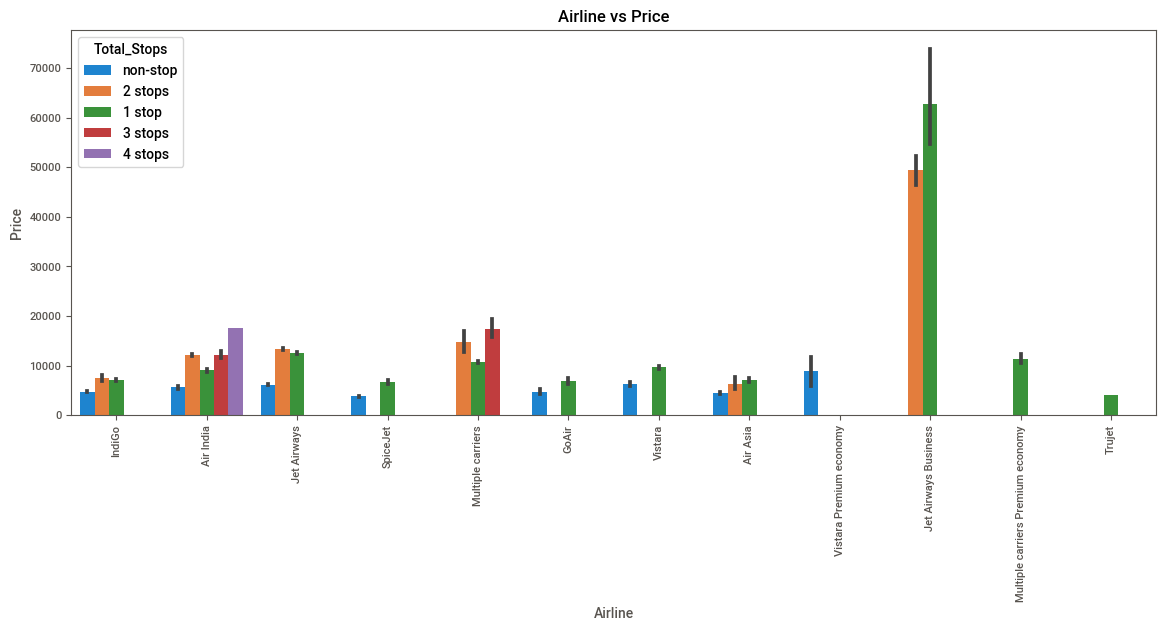

In [ ]:
# Airline vs Price
plt.figure(figsize=(14,5))
sns.barplot(data=data,x='Airline',y='Price',hue='Total_Stops')
plt.xticks(rotation=90)
plt.title('Airline vs Price')

# Insights
1.All Airlines except JetAirways Business,Multiple carriers Premium economy and Trujet are moving to the destination without using any stop also.They are travelling by using stop as well as without using any stop.

2.Those flights which are going to the destination without using any stop are charging less price for the ticket and those,which are using 1 stop or more than that are charging more price for the ticket.

3.We can see one exceptional case in the graph i.e Jet Airways Business is charging extremly high amount than other Airlines.

4.Apart from non-stop,1 stop,2 stop,3 stop,Air India is the only Airline,which is using 4 stop also to reach the destination cities of passengers.

Text(0.5, 1.0, 'Source vs Price')

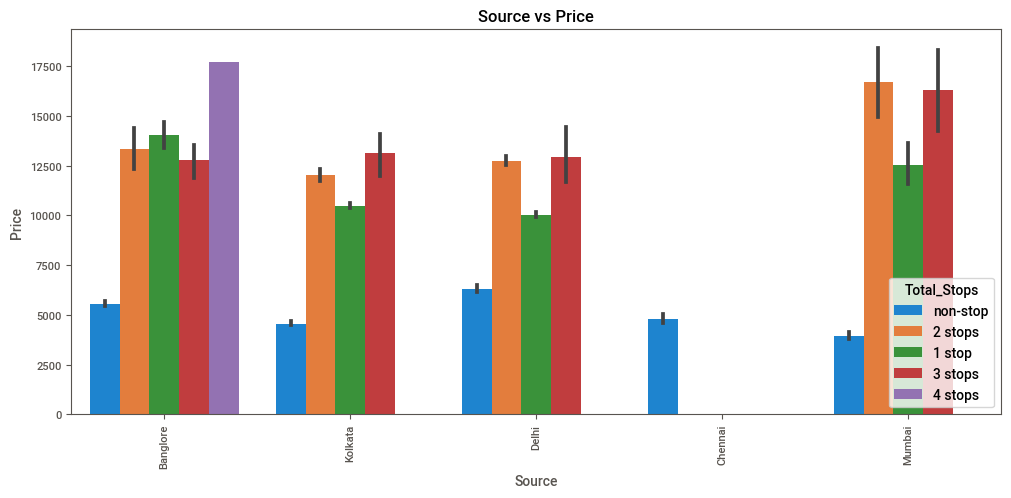

In [ ]:
# Source vs Price
plt.figure(figsize=(12,5))
sns.barplot(data=data,x='Source',y='Price',hue='Total_Stops')
plt.xticks(rotation=90)
plt.title('Source vs Price')

# Insights
1.As we can see in the graph,from all the cities, the price of the ticket is less if passengers are preferring non stop journey.If they are preferring 1 stop/2 stop/3 stop/4 stop, they have to pay more to reach their destination.

2.Banglore is the only source city where flights are using 4 stop also and Chennai is the only source city, from where flights are preferring only non stop journey.

Text(0.5, 1.0, 'Destination vs Price')

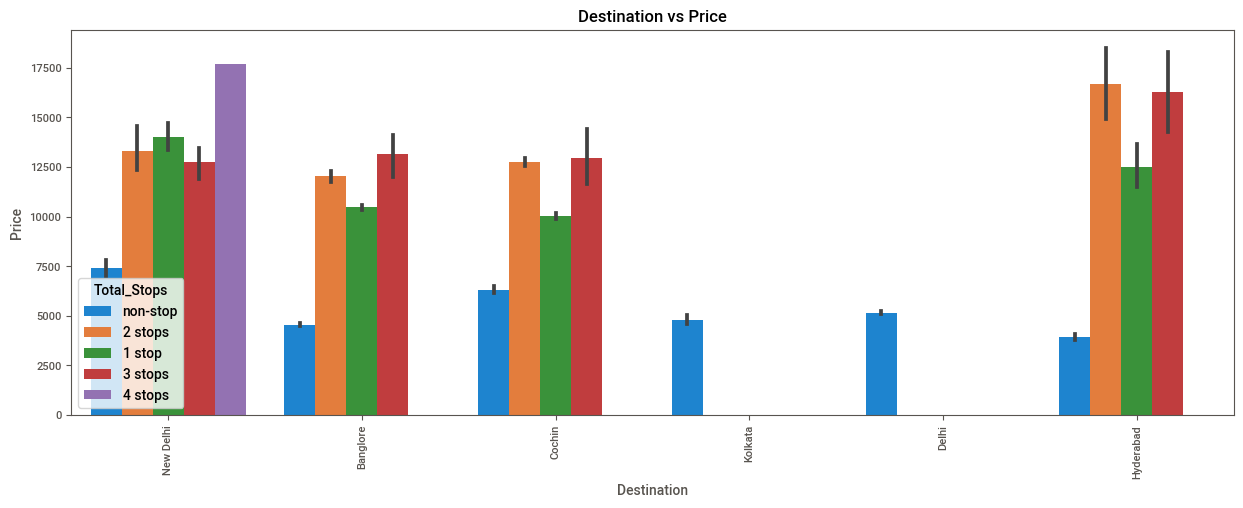

In [ ]:
# Destination vs Price
plt.figure(figsize=(15,5))
sns.barplot(data=data,x='Destination',y='Price',hue='Total_Stops')
plt.xticks(rotation=90)
plt.title('Destination vs Price')

# Insights
1.There are two destination cities i.e Kolkata and Delhi,where flights do only non stop journey .

2.Here also we can see in the graph, the price of non stop journey to destination cities is less as compared to the journey by using stops.

 3.New Delhi is the only city to where flights are using 4 stop to reach that destination city.

Text(0.5, 1.0, 'Additional_Info vs Price')

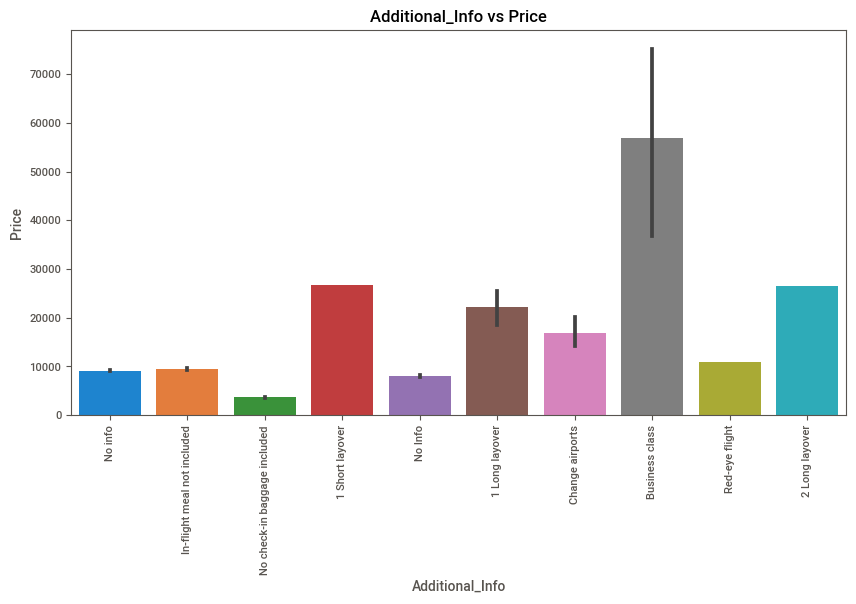

In [ ]:
# Additional_Info vs Price
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='Additional_Info',y='Price')
plt.xticks(rotation=90)
plt.title('Additional_Info vs Price')

# Insights
From the graph it is shown that if passengers are preffering business class,then they have to pay more i.e atleast 35000 rupees.

In [ ]:
# Extract day,month and weekday in different column from Date_of_Journey column
data['Journey_Day']=pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.day
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month
data['weekday']= pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.weekday

In [ ]:
data.drop('Date_of_Journey',axis=1,inplace=True)    # Drop the Date_of_Journey column

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2


Text(0.5, 1.0, 'Week day vs Price')

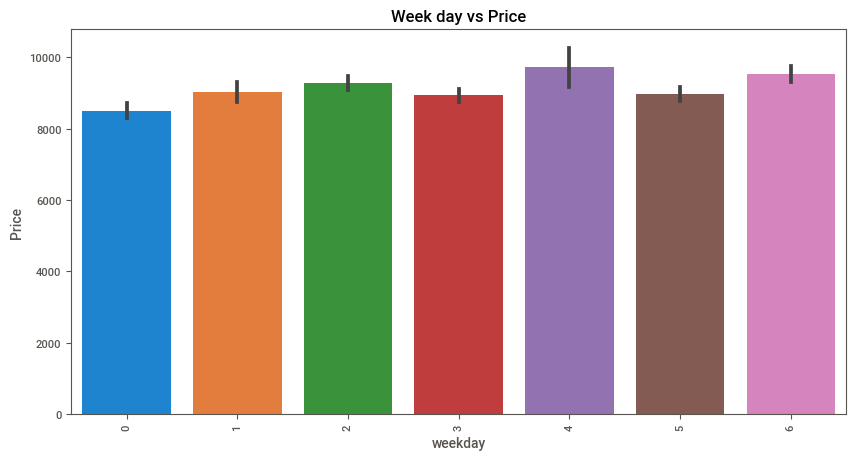

In [ ]:
# Weekday vs Price
plt.figure(figsize=(10,5))
sns.barplot(data=data,x='weekday',y='Price')
plt.xticks(rotation=90)
plt.title( 'Week day vs Price')

# Insights
1.In the x-axis of the above graph 0 indicate Monday,1 is Tuesday,2 is Wednesday,3 is Thursday,4 is Friday,5 is Saturday and 6 is Sunday.

2.The above bar graph clearly shows that on Friday and Sunday,the price of ticket is more as compared to other day.

Text(0.5, 1.0, 'Journey_Month vs Price')

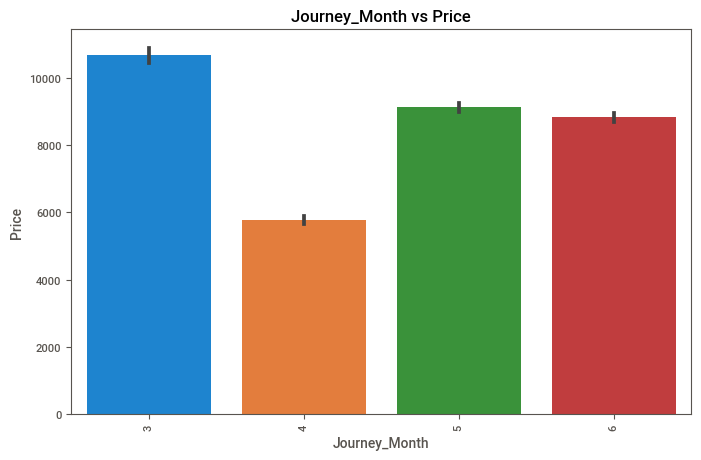

In [ ]:
# Journey_Month vs Price
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Journey_Month',y='Price')
plt.xticks(rotation=90)
plt.title('Journey_Month vs Price')

# Insights
1.In the x-axis of the above graph,3 indicate March, 4 is April,5 is May and 6 is June.

2.The bar graph shows that ticket price of the flight is highest in the month of March and it is slightly less price in May and June.

In [ ]:
data.drop('weekday',axis=1,inplace=True)

In [ ]:
# Convert 'Dep_Time' column to datetime
data['Dep_Time'] = pd.to_datetime(data['Dep_Time'], format='%H:%M')
# Extract hour and minute into separate columns
data['Dep_Hour'] = data['Dep_Time'].dt.hour
data['Dep_Minute'] = data['Dep_Time'].dt.minute

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,1900-01-01 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,1900-01-01 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [ ]:
data.drop('Dep_Time',axis=1,inplace=True)    # drop Dep_Time column

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50


In [ ]:
# Convert 'Arrival_Time' column to datetime
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'], errors='coerce')

# Extract hour and minute into separate columns
data['Arrival_Hour'] = data['Arrival_Time'].dt.hour
data['Arrival_Minute'] = data['Arrival_Time'].dt.minute

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-12-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [ ]:
data.drop('Arrival_Time',axis=1,inplace=True)      # drop Arrival_Time column

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [ ]:
# Convert 'Duration' column to timedelta
data['Duration'] = pd.to_timedelta(data['Duration'])

# Extract hour and minute into separate columns
data['Duration_Hour'] = data['Duration'].dt.components['hours']
data['Duration_Minute'] = data['Duration'].dt.components['minutes']

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,0 days 02:50:00,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,0 days 07:25:00,2 stops,No info,7662,1,5,5,50,13,15,7,25


In [ ]:
data.drop('Duration',axis=1,inplace=True)    # drop Duration column

In [ ]:
data.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


# Multivariate Analysis

Since there are categorical value in features,multivariate analysis is not possible.

# Data Preprocessing

 ### Check missing values

In [ ]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Minute         0
Arrival_Hour       0
Arrival_Minute     0
Duration_Hour      0
Duration_Minute    0
dtype: int64

In [ ]:
data.loc[data.Route.isnull()== True]    # check location of the missing values

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
9039,Air India,Delhi,Cochin,NaN,NaN,No info,7480,6,5,9,45,9,25,23,40


In [ ]:
data.drop(9039,axis=0,inplace=True)  # drop missing value row

In [ ]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Minute         0
Arrival_Hour       0
Arrival_Minute     0
Duration_Hour      0
Duration_Minute    0
dtype: int64

### Check duplicate values

In [ ]:
data.duplicated().sum()

223

In [ ]:
data = data.drop_duplicates(keep='first')

In [ ]:
data.duplicated().sum()   # check no.of duplicate values after dropping

0

# Converting Categorical value to Numerical value

In [ ]:
cate_column=data.select_dtypes(include=['O'])      # select only categorical column
cate_column

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info


In [ ]:
data1=data.copy()   # copy the dataset to another variable
data1.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25


## Converting categorical data to numerical data by encoding

a.There are four types of encoding.These are label encoding,one hot encoding,manual encoding and frequency encoding.

b.After analysing the dataset,I am applying one hot encoding.

In [ ]:
df1=pd.get_dummies(data1['Airline'],prefix='Airline',drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop('Airline',axis=1)

In [ ]:
data1.head(2)

,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,...,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1=pd.get_dummies(data1['Source'],prefix='Source',drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop('Source',axis=1)

In [ ]:
data1.head(2)

,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,...,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,0
1,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df1=pd.get_dummies(data1['Destination'],prefix='Destination',drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop('Destination',axis=1)

In [ ]:
df1=pd.get_dummies(data1['Total_Stops'],prefix='Total_Stops',drop_first=True)
data1=pd.concat([data1,df1],axis=1).drop('Total_Stops',axis=1)

In [ ]:
data1.head(2)

,Route,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,BLR → DEL,No info,3897,24,3,22,20,1,10,2,...,0,0,0,0,0,1,0,0,0,1
1,CCU → IXR → BBI → BLR,No info,7662,1,5,5,50,13,15,7,...,0,0,0,0,0,0,1,0,0,0


## Feature Selection

### dropping unwanted variable¶

In [ ]:
data.Additional_Info.value_counts()

No info                         8179
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

Since Additional_Info has 8179 no info out of 10459,we are dropping this column.

In [ ]:
data1.drop('Additional_Info',axis=1,inplace=True)

In [ ]:
data1.head(2)

,Route,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,BLR → DEL,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,1,0,0,0,1
1,CCU → IXR → BBI → BLR,7662,1,5,5,50,13,15,7,25,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# since we have already Total_Stops column,there is no use of Route column.So we are dropping this column
data1.drop('Route',axis=1,inplace=True)


In [ ]:
data1.head(2)

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,1,0,0,0,1
1,7662,1,5,5,50,13,15,7,25,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
x=data1.drop("Price",axis=1)
x.head(2)

,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Airline_Air India,Airline_GoAir,...,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,24,3,22,20,1,10,2,50,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,5,5,50,13,15,7,25,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
x=scaling.fit_transform(x)
print(x)

[[0.88461538 0.         0.95652174 ... 0.         0.         1.        ]
 [0.         0.66666667 0.2173913  ... 0.         0.         0.        ]
 [0.30769231 1.         0.39130435 ... 0.         0.         0.        ]
 ...
 [1.         0.33333333 0.34782609 ... 0.         0.         1.        ]
 [0.         0.         0.47826087 ... 0.         0.         1.        ]
 [0.30769231 0.66666667 0.43478261 ... 0.         0.         0.        ]]


In [ ]:
data2=data1.iloc[0:10,0:9]
data2

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,3897,24,3,22,20,1,10,2,50
1,7662,1,5,5,50,13,15,7,25
2,13882,9,6,9,25,4,25,19,0
3,6218,12,5,18,5,23,30,5,25
4,13302,1,3,16,50,21,35,4,45
5,3873,24,6,9,0,11,25,2,25
6,11087,12,3,18,55,10,25,15,30
7,22270,1,3,8,0,5,5,21,5
8,11087,12,3,8,55,10,25,1,30
9,8625,27,5,11,25,19,15,7,50


In [ ]:
data2.corr()

,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
Price,1.000000,-0.659511,-0.366571,-0.333911,0.031325,-0.193463,-0.203835,0.757304,-0.542767
Journey_Day,-0.659511,1.000000,0.267372,0.305646,-0.319999,-0.071263,-0.117263,-0.428488,0.487520
Journey_Month,-0.366571,0.267372,1.000000,-0.400946,-0.399323,0.166297,0.162142,0.016077,-0.332520
Dep_Hour,-0.333911,0.305646,-0.400946,1.000000,-0.020904,0.080281,0.201823,-0.225664,0.528181
Dep_Minute,0.031325,-0.319999,-0.399323,-0.020904,1.000000,0.116379,0.322526,-0.147417,0.304109
Arrival_Hour,-0.193463,-0.071263,0.166297,0.080281,0.116379,1.000000,0.573010,-0.373610,0.362001
Arrival_Minute,-0.203835,-0.117263,0.162142,0.201823,0.322526,0.573010,1.000000,-0.311445,0.080203
Duration_Hour,0.757304,-0.428488,0.016077,-0.225664,-0.147417,-0.373610,-0.311445,1.000000,-0.711710
Duration_Minute,-0.542767,0.487520,-0.332520,0.528181,0.304109,0.362001,0.080203,-0.711710,1.000000


<Axes: >

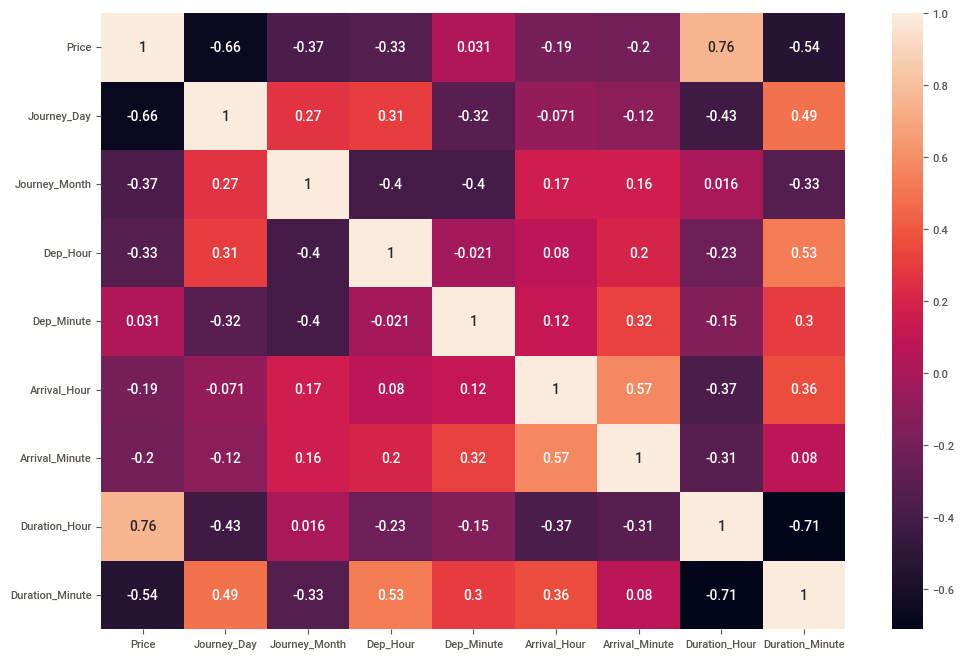

In [ ]:
# Finding the correlation by using heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data2.corr(),annot=True)

# Model Creation

## Linear Regression

In [ ]:
# split data into x and y
x=data1.drop('Price',axis=1)
y=data1['Price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=25)

In [ ]:
x_train.shape

(7321, 32)

In [ ]:
x_test.shape

(3138, 32)

In [ ]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
# initialise the model
model1=LinearRegression()

In [ ]:
# train model with x_train and y_train
model1.fit(x_train,y_train)

LinearRegression()

In [ ]:
# make predictions / test model
y_pred=model1.predict(x_test)
y_pred

array([ 6962.88335511, 12117.0256291 , 11906.2389657 , ...,
       11110.09098673,  4314.09061455,  7695.20932598])

In [ ]:
# slopes/coefficient of x
model1.coef_

array([-7.57063953e+01, -4.22295576e+02,  2.13728460e+01, -4.88072183e-01,
       -1.59043839e+01,  2.02604016e+00,  7.62270380e+00,  1.36645058e+00,
        1.86410852e+03,  2.13856912e+02,  3.43381870e+02,  4.51108072e+03,
        4.94005844e+04,  3.79056023e+03,  4.15575409e+03, -6.30033021e+01,
       -2.88284778e+03,  2.45351203e+03,  3.75889756e+03,  8.11525499e+01,
       -5.14053415e+01, -2.79242148e+02, -8.04003282e+02, -5.14053415e+01,
       -7.35583169e+02, -8.04003282e+02,  8.11525499e+01,  1.78908139e+03,
        2.43609503e+03,  3.65927916e+03,  5.10110569e+03, -3.23942971e+03])

In [ ]:
# intercept
model1.intercept_

10247.157282065062

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
## MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

7084467.125241154

In [ ]:
## MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

1955.676091765394

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   # linear regression r2_score

0.6388259852024802

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)


In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
## MSE
MSE=mean_squared_error(y_test,y_pred)
MSE

8797977.585643722

In [ ]:
## MAE
MAE=mean_absolute_error(y_test,y_pred)
MAE

1886.1410133843212

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.5514693158241781

In [ ]:
# how to select k value
error_rate=[]
for k in range(1,11):
  KNN=KNeighborsRegressor(n_neighbors=k)
  KNN.fit(x_train,y_train)
  y_pred=KNN.predict(x_test)
  error_rate.append(np.mean(y_pred!=y_test))


In [ ]:
error_rate

[0.8116634799235182,
 0.9298916507329509,
 0.9684512428298279,
 0.98565965583174,
 0.9904397705544933,
 0.9936265137029955,
 0.9974506054811982,
 0.9990439770554493,
 1.0,
 1.0]

Text(0.5, 1.0, 'k v/s error')

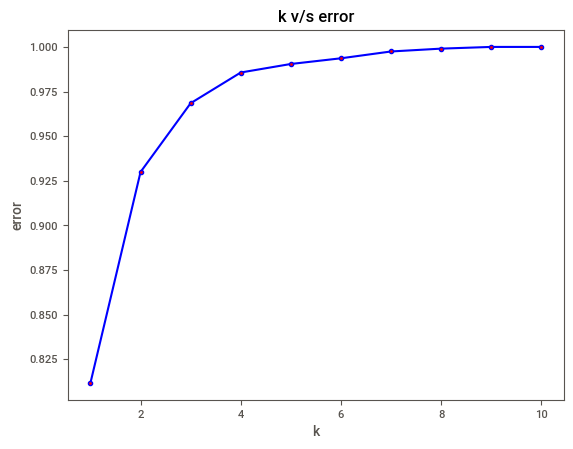

In [ ]:
plt.plot(range(1,11),error_rate,color='blue',marker="o",markerfacecolor='red')
plt.xlabel("k")
plt.ylabel("error")
plt.title("k v/s error")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=4)
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse

8171245.47613926

In [ ]:
mae=mean_absolute_error(y_test,y_pred)
mae

1936.087635436584

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)     # KNN r2_score

0.5834208159427619

# Decision Tree

In [ ]:
# Split data into x and y
x=data1.drop('Price',axis=1)
y=data1['Price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor # Import the algorithm
model2=DecisionTreeRegressor()     # initialise the model
model2.fit(x_train,y_train)        #train the model
y_pred=model2.predict(x_test)      # Predictions -- x_test

In [ ]:
y_train_predict=model2.predict(x_train)

In [ ]:
y_train_predict

array([10539. , 10844. ,  1991. , ..., 12513. , 11087. , 12707.5])

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

6168263.008681574

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1391.8557361376675

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_predict)   #training score

0.9738465482710101

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   #testing score

0.7194559168320651

In [ ]:
adj_r2=1-(1-0.71)*(3138-1)/(3138-32-1)
adj_r2

0.7070112721417069

Here training score is good but testing score is bad.So it results overfitting.To overcome this,we are using hyper parameter tuning in decision tree.

## Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "criterion":('mse', 'friedman_mse', 'mae'),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}

In [ ]:
# Applying the Grid Search CV

dtc = DecisionTreeRegressor()
model3= GridSearchCV(dtc, params, scoring='neg_mean_squared_error', cv=5)
model3.fit(x_train,y_train)
best_params = model3.best_params_
print(model3.best_params_)

{'criterion': 'friedman_mse', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'best'}


In [ ]:
dtc1 = DecisionTreeRegressor(criterion='friedman_mse',max_depth= 15, min_samples_leaf= 3, min_samples_split= 2, splitter='random')
dtc1.fit(x_train,y_train)
y_predict=dtc1.predict(x_test)

In [ ]:
y_train_pred = dtc1.predict(x_train)

In [ ]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  4816667.147591476


In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  2418631.894297238


In [ ]:
mean_absolute_error(y_test,y_predict)

1301.9769943659705

In [ ]:
mean_absolute_error(y_train,y_train_pred)

925.7334611843927

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_predict)   #training score

0.9738465482710101

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_predict)   #testing score

0.7809290124392748

After applying hyper parameter tuning, we can clearly see better testing score as compared to the previous score

# Random Forest

In [ ]:
# Split data into x and y
x=data1.drop('Price',axis=1)
y=data1['Price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model4=RandomForestRegressor()
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)

In [ ]:
y_train_pred=model4.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_train,y_train_pred)
MSE

898232.3428800674

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

4008443.505361878

In [ ]:
MAE=mean_absolute_error(y_train,y_train_pred)
MAE

552.7198445669054

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1211.848008292315

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_pred)   #training score

0.9574714784922138

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)   #testing score

0.817688528105974

Here also training score is more as compared to the testing score and results overfitting.To solve this problem we are applying hyper parameter tuning technique.

## Hyper parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.model_selection import RandomizedSearchCV
# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(10, 200, 10)],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [int(x) for x in np.linspace(10, 110, 11)],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create RandomizedSearchCV
rf_cv = RandomizedSearchCV(estimator=model4, param_distributions=param_dist, n_iter=10,
                            scoring='neg_mean_squared_error', cv=5, random_state=42)
rf_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 31, 52, 73, 94,
                                                         115, 136, 157, 178,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
# Print the best parameters and corresponding MSE score
print("Best Parameters: ", rf_cv.best_params_)
print("Best Negative Mean Squared Error: ", rf_cv.best_score_)


Best Parameters:  {'n_estimators': 178, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70}
Best Negative Mean Squared Error:  -3862775.8252679994


In [ ]:
model4 = RandomForestRegressor(n_estimators=136, min_samples_split=5, min_samples_leaf= 1, max_features='log2',max_depth= 20)
model4.fit(x_train,y_train)
y_predict=dtc1.predict(x_test)

In [ ]:
y_train_pred = model4.predict(x_train)

In [ ]:
# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  2868942.975646615


In [ ]:
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Test Set: ", mse)

Mean Squared Error on Test Set:  2012759.0392701381


In [ ]:
mean_absolute_error(y_test,y_predict)

1044.2280005504583

In [ ]:
mean_absolute_error(y_train,y_train_pred)

887.3018266985513

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_train,y_train_pred)   #training score

0.9077160518249847

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_predict)   #testing score

0.8540871422102453

Though testing score is less than traing score,after applying hyper parameter tuning,the results are good as compared to the previous score.

# Boosting

## Gradient Boosting

In [ ]:
# Split data into x and y
x=data1.drop('Price',axis=1)
y=data1['Price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
## Model Building
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [ ]:
y_pred=gb.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

4312737.884963377

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1506.6290859321348

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.7829432262626147

## XG Boost

In [ ]:
# Split data into x and y
x=data1.drop('Price',axis=1)
y=data1['Price']

In [ ]:
# split data for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBRegressor
model5=XGBRegressor()
model5.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model5.predict(x_test)

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3158766.6936389166

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1181.2258663335524

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.8410217069066804

## Hyper parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
param_grid={'gamma':[0.01,0.2,0.4,0.8,0.1,2,101.2,42.5],
           'learning_rate':[0.01,0.02,0.04,0.18,0.28],
           'max_depth':[4,8,5,6,9,12,15,20,22,24],
           'n_estimators':[25,56,45,89,125,250,450,280],
           'reg_alpha':[0,0.1,0.4,0.2,0.6,0.8,12.5,8.5],
           'reg_lambda':[0,0.1,0.2,0.4,0.8,1.8,6.5,8.25,4.8]}

In [ ]:
XGB=XGBRegressor(random_state=42,verbosity=0)

In [ ]:
rcv=RandomizedSearchCV(estimator=XGB,scoring='r2',param_distributions=param_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
rcv.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=42, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0.01, 0.2, 0.4, 0.8, 0.1, 2,
                                                  101.2, 42.5],
                                        'learning_rate': [0.01, 0.02, 0.04,
                                                          0.18, 0.28],
                                        'max_depth': [4, 8, 5, 6, 9, 12, 15, 20,
                                                      22, 24],
                                        'n_estimators': [25, 56, 45, 89, 125,
                                                         250, 450, 280],
                                        'reg_alpha': [0, 0.1, 0.4, 0.2, 0.6,
                                                      0.8, 12.5, 8.5],
                                        'reg_lambda': [0, 0.1, 0.2, 0.4, 0.8,
                                                       1.8, 6.5, 8.25, 4.8]},
                   random_state=42, scoring='r2', verbose=2)

In [ ]:
cv_best_params=rcv.best_params_
print(f'best parameters:{cv_best_params}')

best parameters:{'reg_lambda': 0.8, 'reg_alpha': 0.8, 'n_estimators': 25, 'max_depth': 9, 'learning_rate': 0.28, 'gamma': 101.2}


In [ ]:
XGB_model=XGBRegressor(reg_lambda= 0.8, reg_alpha=0.8, n_estimators=25, max_depth=9, learning_rate=0.28, gamma=101.2)
XGB_model.fit(x_train,y_train)
y_predict=XGB_model.predict(x_test)

In [ ]:
y_train_pred=XGB_model.predict(x_train)

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3158766.6936389166

In [ ]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

1181.2258663335524

In [ ]:
## RMSE
RMSE=np.sqrt(MSE)
r2_score(y_test,y_pred)

0.8410217069066804

# Model Comparision Report

## Model 1 - Linear Regression
### r2_score-0.6388 i.e nearly 64%

## Model 2 - KNN
### r2_score-0.5838 i.e 58%

## Model 3 - Decision Tree
training r2_score-0.9738 i.e-97%

testing r2_score-0.7231 i.e-72%

After hyper parameter tuning technique

training r2_score-0.9738 i.e 97%

testing r2_score-0.7881 i.e 79%

## Model 4 - Random Forest
training score-0.9570 i.e 95%

testing score-0.8252 i.e 82%

After hyper parameter tuning technique

training score-0.9077 i.e 90%

testing score-0.8672 i.e 86%

## Model 5 - Boosting
### Gradient Boosting

r2_score-0.7831 i.e 78%

XGBoost

r2_score-0.8410 i.e 84%

After hyper parameter tuning

r2_score-0.8410 i.e 84%

# Conclusion¶
a. KNN score is very less that is 58% as compared to all other model.Since it is a lazy algorithm and it only learns during the testing time,that is why the score is less.

b. After hyper parameter tuning technique,random forest score is very good i.e 86% as compared to all other model.So it is the best model for this dataset.

# Challenges faced on data
Since there are so many categorical value in feature columns,analysing data was very difficult.

# Technique used to solve the problem
We had to covert it to numerical value by using datetime function,timedelta function etc.